#### import packages

In [63]:
import os
import numpy as np
import rasterio
import joblib 
from pathlib import Path
import matplotlib.pyplot as plt

>- Define functions

In [64]:
def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)

def calculate_ndwi(nir, swir):
    return (nir - swir) / (nir + swir + 1e-10)

def extract_features(image_path):
    with rasterio.open(image_path) as src:
        bands = src.read()
        nir, red, swir = bands[3], bands[2], bands[4]
        
        ndvi = calculate_ndvi(nir, red)
        ndwi = calculate_ndwi(nir, swir)
        
        return [
            np.mean(ndvi), np.std(ndvi),
            np.mean(ndwi), np.std(ndwi),
            np.percentile(nir, 75),
            np.mean(swir > np.quantile(swir, 0.75))
        ]

def extract_features_for_svm(image_path):
    with rasterio.open(image_path) as src:
        bands = src.read()
        nir, red, swir = bands[3], bands[2], bands[4]
        
        # Existing features
        ndvi = calculate_ndvi(nir, red)
        ndwi = calculate_ndwi(nir, swir)
        
        # New features
        return [
            np.mean(ndvi), np.std(ndvi),  # Add standard deviation
            np.mean(ndwi), np.std(ndwi),
        ]

def display_stage_image(image_path):
    if not os.path.exists(image_path) or not os.path.isfile(image_path):
        print(f"No file found at: {image_path}")
        return
    
    with rasterio.open(image_path) as src:
        image = src.read()
        
        # Assuming bands are ordered as Red, NIR, SWIR
        red_band = image[0].astype(float)
        nir_band = image[1].astype(float)
        swir_band = image[2].astype(float)
        
        ndvi_image = calculate_ndvi(nir_band, red_band)
        ndwi_image = calculate_ndwi(nir_band, swir_band)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(red_band, cmap='gray')  # Show raw image as grayscale
    plt.title("Raw Image (Red Band)")
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(ndvi_image, cmap='RdYlGn')
    plt.title("NDVI Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(ndwi_image, cmap='Blues')
    plt.title("NDWI Image")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

>- Define classes & file paths

In [65]:
growth_stages = ["germination", "tillering", "grand_growth", "ripening"]

germination_img = Path('../../data/model/Patches/Test/germination/patch_50.tif')
tillering_img = Path('../../data/model/Patches/Test/tillering/patch_199.tif')
grand_growth_img = Path('../../data/model/Patches/Test/grand_growth/patch_132.tif')
ripening_img = Path('../../data/model/Patches/Test/ripening/patch_1344.tif')

>- View images

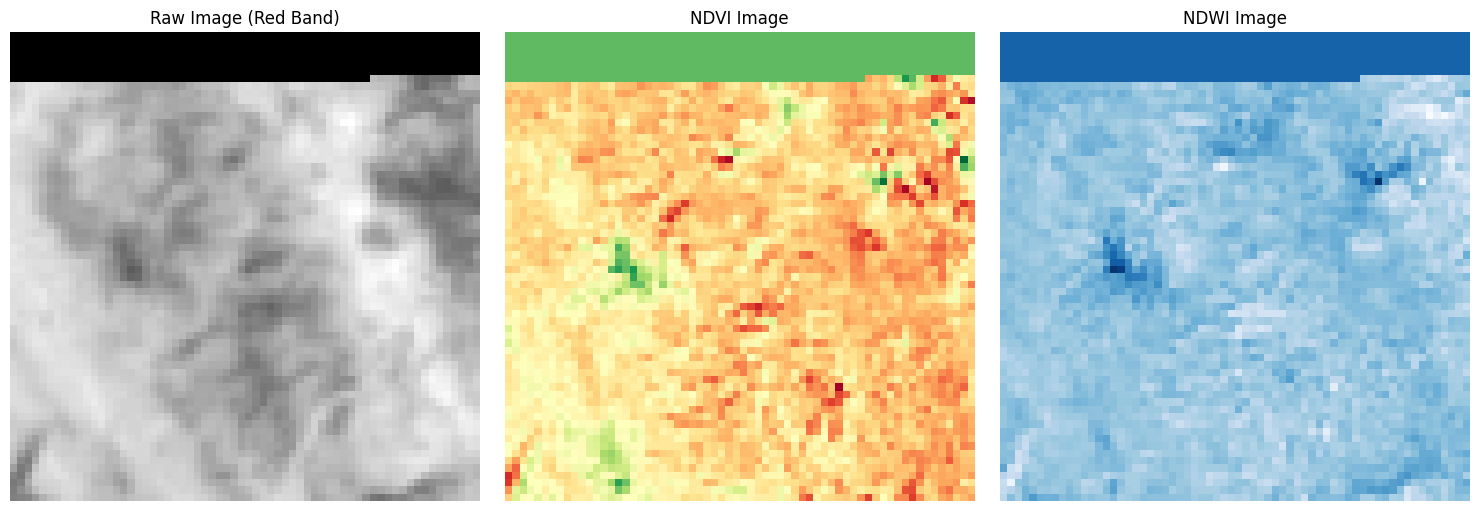

In [66]:
# germination
display_stage_image(germination_img)

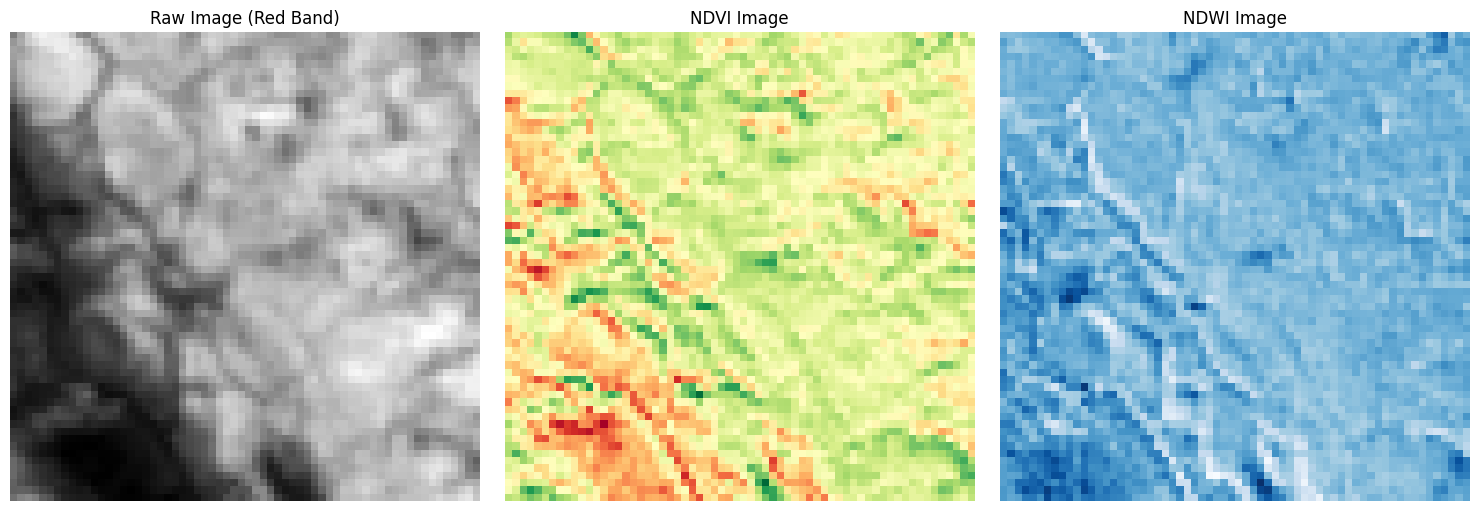

In [67]:
# tillering
display_stage_image(tillering_img)

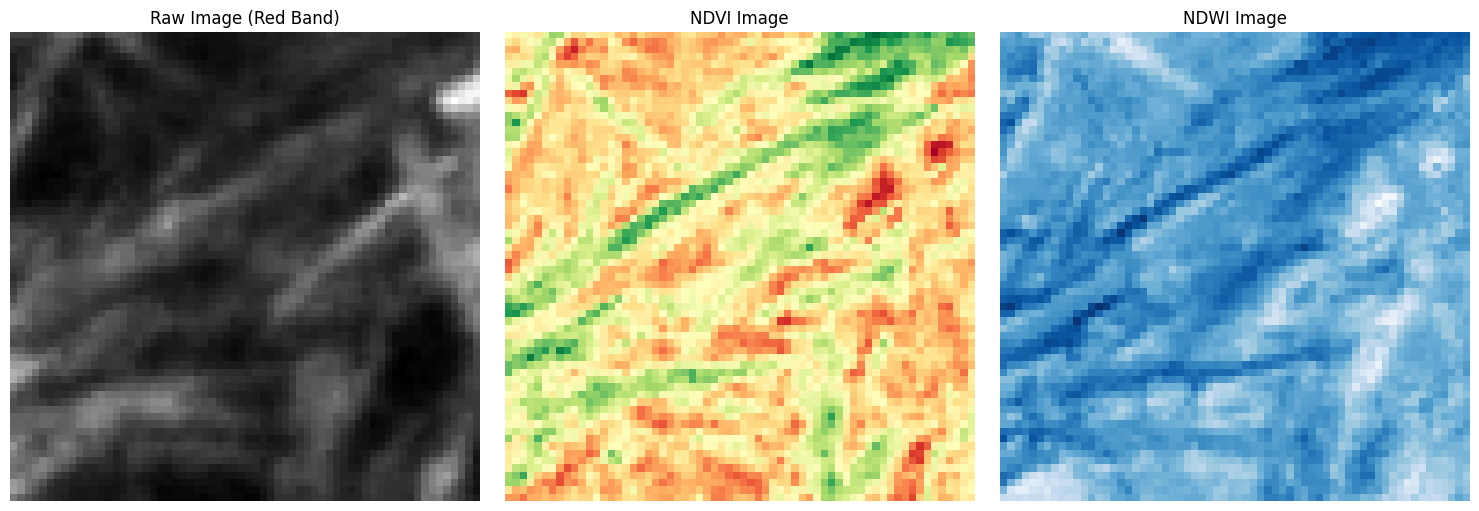

In [68]:
# grand growth
display_stage_image(grand_growth_img)

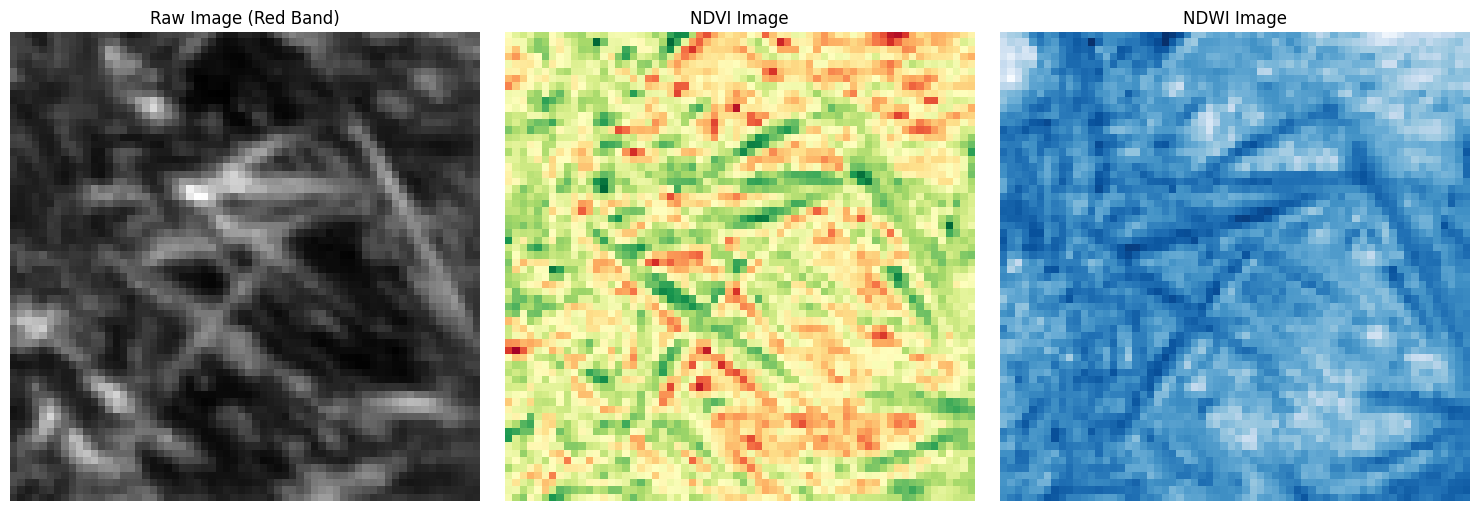

In [69]:
# ripening
display_stage_image(ripening_img)

### load modeland predict

In [70]:
def predict_growth_stage(image_path, model):
    features = extract_features(image_path)
    predicted_label = model.predict([features])[0]
    return growth_stages[predicted_label]

def predict_growth_stage_for_svm(image_path, model):
    features = extract_features_for_svm(image_path)
    predicted_label = model.predict([features])[0]
    return growth_stages[predicted_label]

RF_model_v1 = joblib.load(Path("../../models/Map/rf_model_v1.joblib"))
RF_model_v2 = joblib.load(Path("../../models/Map/rf_model_v2.joblib"))
RF_model_v3 = joblib.load(Path("../../models/Map/rf_model_v3.joblib"))

XGB_model_v2 = joblib.load(Path("../../models/Map/xgb_model_v2.joblib"))
XGB_model_v3 = joblib.load(Path("../../models/Map/xgb_model_v3.joblib"))
XGB_model_v4 = joblib.load(Path("../../models/Map/xgb_model_v4.joblib"))

SVM_model_v1 = joblib.load(Path("../../models/Map/svm_model_v1.joblib"))
SVM_model_v2 = joblib.load(Path("../../models/Map/svm_model_v2.joblib"))
SVM_model_v3 = joblib.load(Path("../../models/Map/svm_model_v3.joblib"))



In [80]:
# germination predict
predicted_stage = predict_growth_stage(germination_img, RF_model_v2)
print(f"Predicted Growth Stage: {predicted_stage}")
print()



Predicted Growth Stage: germination



In [ ]:
# this code Only for SVM
predicted_stage = predict_growth_stage_for_svm(germination_img, SVM_model_v2)
print(f"Predicted Growth Stage: {predicted_stage}")
print()

Predicted Growth Stage: germination



In [83]:
# tillering predict
predicted_stage = predict_growth_stage(tillering_img, RF_model_v2)
print(f"Predicted Growth Stage: {predicted_stage}")
print()

Predicted Growth Stage: tillering



In [ ]:
# this code Only for SVM
predicted_stage = predict_growth_stage_for_svm(tillering_img, SVM_model_v2)
print(f"Predicted Growth Stage: {predicted_stage}")
print()

Predicted Growth Stage: tillering



In [85]:
# grand growth predict
predicted_stage = predict_growth_stage(grand_growth_img, RF_model_v2)
print(f"Predicted Growth Stage: {predicted_stage}")
print()

Predicted Growth Stage: germination



In [ ]:
# this code Only for SVM
predicted_stage = predict_growth_stage_for_svm(tillering_img, SVM_model_v2)
print(f"Predicted Growth Stage: {predicted_stage}")
print()

Predicted Growth Stage: tillering



In [84]:
# ripening predict
predicted_stage = predict_growth_stage(ripening_img, RF_model_v2)
print(f"Predicted Growth Stage: {predicted_stage}")
print()

Predicted Growth Stage: ripening



In [ ]:
# this code Only for SVM
predicted_stage = predict_growth_stage_for_svm(tillering_img, SVM_model_v2)
print(f"Predicted Growth Stage: {predicted_stage}")
print()

Predicted Growth Stage: tillering

